# Titanic: Machine Learning from Disaster - Exploratory Data Analysis
***

**train.csv** will contain the details of a subset of the passengers on board (891 to be exact), will reveal whether they survived or not, also known as the `“ground truth”`.

**test.csv** dataset contains similar information but does not disclose the “ground truth” for each passenger.

## Features

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

**Note**
<p><b>pclass</b>: A proxy for socio-economic status (SES)<br> 1st = Upper<br> 2nd = Middle<br> 3rd = Lower<br><br> <b>age</b>: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5<br><br> <b>sibsp</b>: The dataset defines family relations in this way...<br> Sibling = brother, sister, stepbrother, stepsister<br> Spouse = husband, wife (mistresses and fiancés were ignored)<br><br> <b>parch</b>: The dataset defines family relations in this way...<br> Parent = mother, father<br> Child = daughter, son, stepdaughter, stepson<br> Some children travelled only with a nanny, therefore parch=0 for them.</p>

# Importing the necessary libraries

In [29]:
import numpy as np
import pandas as pd
from statsmodels.api import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
df = pd.read_csv('data/train.csv')

# Data Preprocessing
***

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

**Observations**:
* There are 891 entries in total, out of which Age, and Cabin attributes have missing elements.
* Survived is our target attribute which is of int64 datatype, consisting of only 0s and 1s, indicating whether the passenger survived or not.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## Drop attributes

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
df.drop(['Name', 'Cabin'], axis=1, inplace=True)

## Filling in missing data

In [39]:
# Filling in missing values with 'Q'
df.fillna({'Embarked':'Q'}, inplace=True)

In [40]:
# Fill in missing age data with median of Age
df.fillna({'Age': df['Age'].median()}, inplace=True)

## Converting Object type values into Categorical data

In [41]:
# Sex
df['Sex'] = df['Sex'].astype('category')

# Ticket
df['Ticket'] = df['Ticket'].astype('category')

# Embark
df['Embarked'] = df['Embarked'].astype('category')

# Univariate Analysis

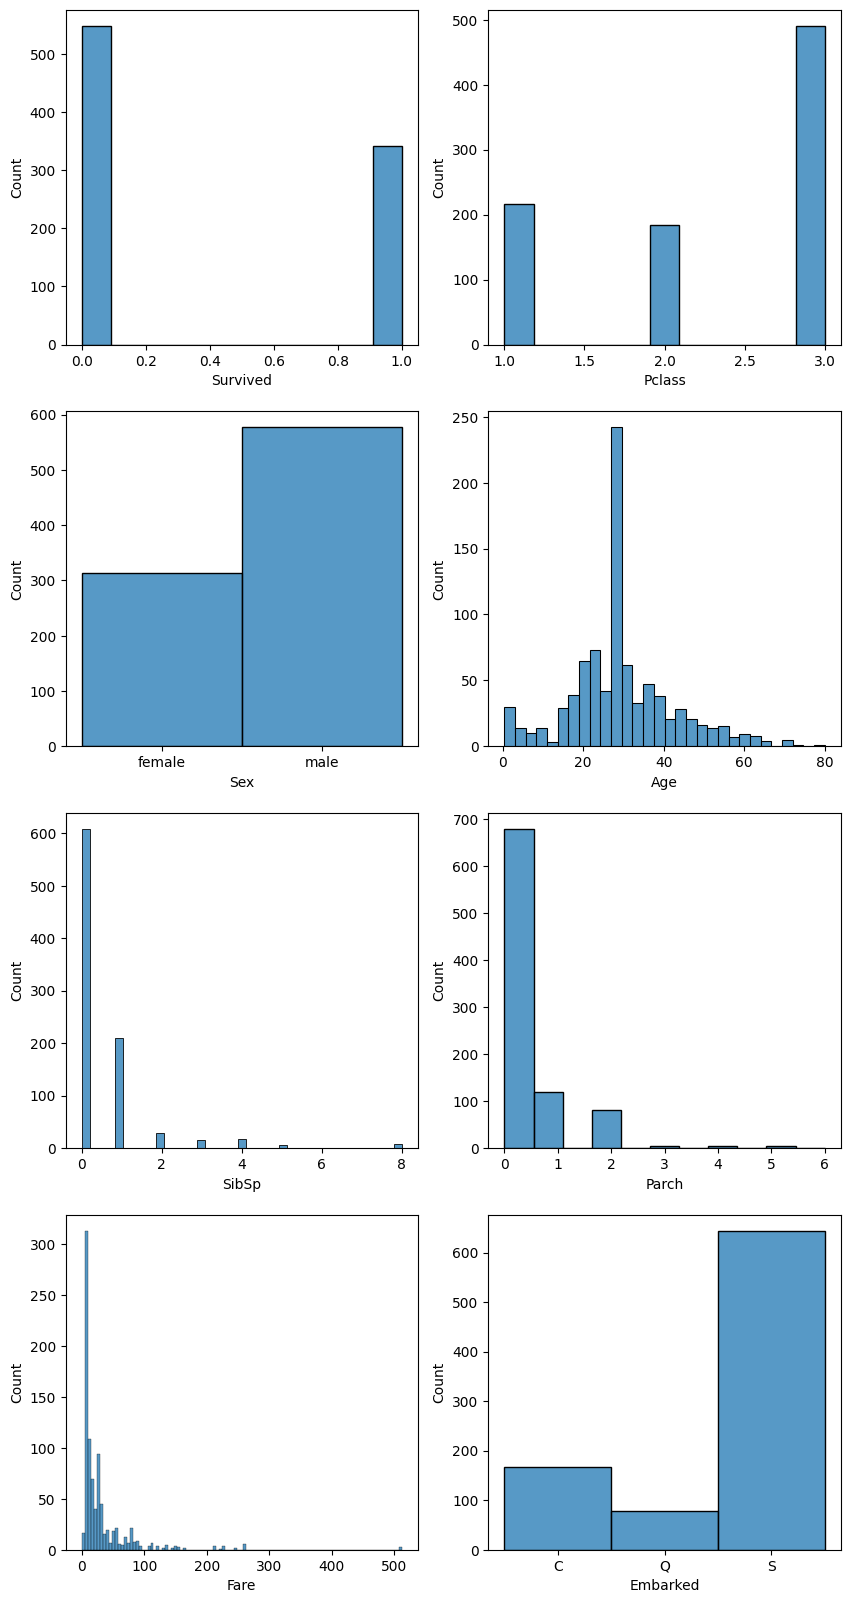

In [42]:
fig, axes = plt.subplots(
    nrows=4, 
    ncols=2,
    figsize=(10, 20)
)

relevant_cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
col = 0
for row in axes:
    for ax in row:
        sns.histplot(
            df,
            x=relevant_cols[col],
            ax=ax
        );
        col += 1
    
plt.show();

**Observations**:
* **Survived**: More than 50% of the passengers survived.
* **Pclass**: Most of the passengers were of lower class.
* **Sex**: Most of the passengers where 'Male'.
* **Age**: Most of the passengers were between ages 20 and 40.
>   Uniform Distribution with mean around 30.
* **SibSp**: Most passengers travelled alone.
* **Parch**: Most passengers travelled alone.
* **Fare**: Most passengers travelled with low fares.
>   Heavily Right-skewed.

# Bivariate Analysis

In [43]:
data = df.corr(numeric_only=True)

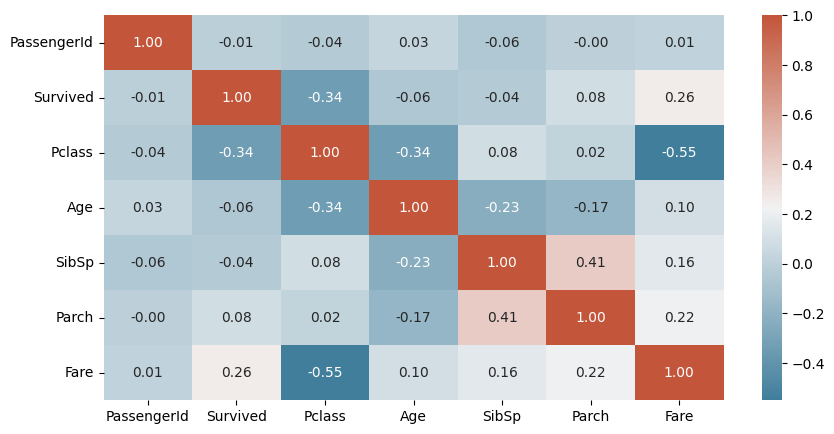

In [44]:
plt.figure(figsize=(10, 5))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data, annot=True, cmap=cmap, fmt='0.2f');
plt.show()

**Observations:**
* **Correlations involving the dependent variable**
    * Highest possible correlation is between `Survived` and `Pclass` which is a Negative Correlation, implying that it was more likely for a higher class person to survive the shipwreck.
> Also explains the strong Positive correlation between `Survived` and `Fare`, since the higher class passenger would've paid more for their tickets.
    * Negative Correlation between `Survived` and `Age`, implying younger passengers had a higher chance of survival.
> Also explains the strong Negative correlation between `Parch` and `Age` since children would've been accompanied by their parents.
    * Positive Correlation between `Survived` and `Parch`, implying passengers accompanied by parents had a higher likelihood of survival.

* **Correlations involving independent variables**
    * Highest possible correlation is between `Pclass` and `Fare`, implying higher class passengers paid more for their tickets.
    * Strong Positive Correlation between `Parch` and `SibSp`, implying that passenger who were accompanied 
    * Strong Negative Correlation between `Pclass` and `Age`, signifying that many of the lower class passengers were younger. 
    * Strong Negative Correlation between `Age` and `Parch`, implying younger passengers were accompanied by their parents.

# Visualizing the data
***

## Plots over the Dependent variable

**Survived v/s Pclass**

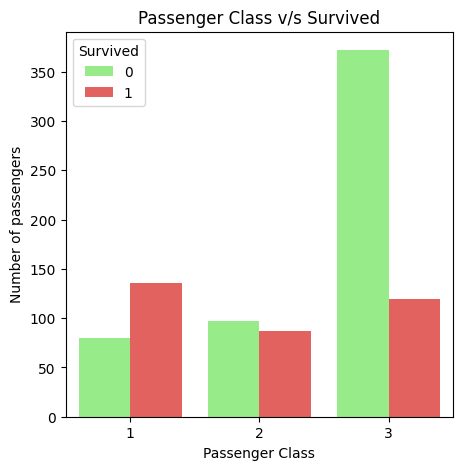

In [45]:
fig = plt.figure(figsize=(5, 5))
sns.countplot(
    data=df,
    x='Pclass',
    hue='Survived',
    palette=['#8bfc77', '#f74e48']
);
plt.title("Passenger Class v/s Survived");
plt.xlabel("Passenger Class");
plt.ylabel("Number of passengers");

**Observations:**
* Most of the passengers who belonged to the lower socio-economic class survived, where as most of the higher ranking passengers perished.
* The number of passengers who did not survive were roughly the same in each class.

**Survived v/s Age**

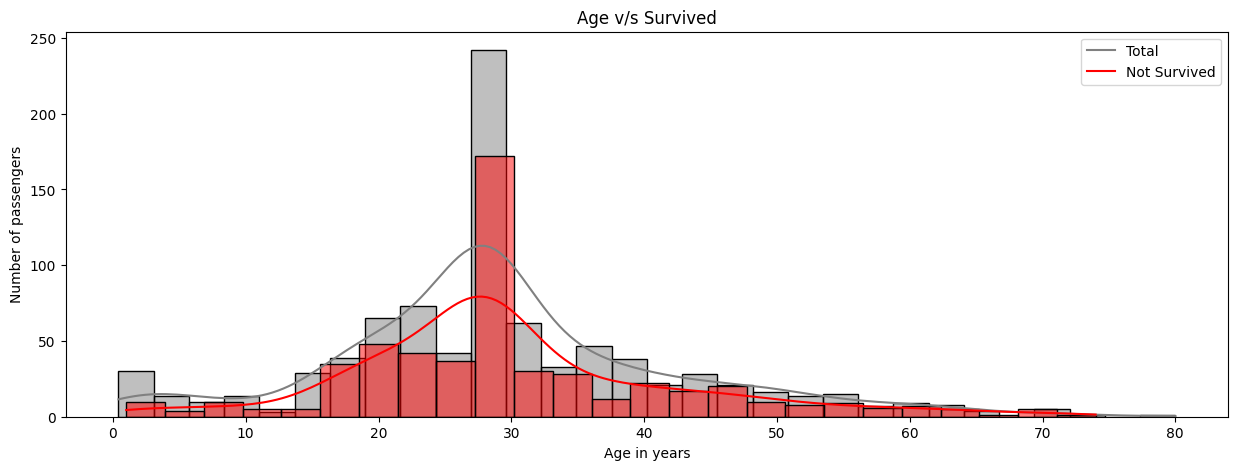

In [46]:
fig, ax_age = plt.subplots(figsize=(15, 5));

# Age distribution
survived = sns.histplot(
    x=df.Age,
    kde=True,
    ax=ax_age,
    color='grey'
);

# Passengers who did not survive
sns.histplot(
    data=df.Age[df['Survived'] == 0],
    kde=True,
    ax=ax_age,
    color='red'
);

ax_age.set_title("Age v/s Survived");
ax_age.set_xlabel("Age in years");
ax_age.set_ylabel("Number of passengers");
ax_age.legend(["Total", "Not Survived"]);

**Observations:**
* Most of the passengers were around the age of 20 to 35.
* Most of the casualties were of the same age group.
* The older passengers were less likely to survive.

## Plots over Independent Variables

**Pclass v/s Fare**

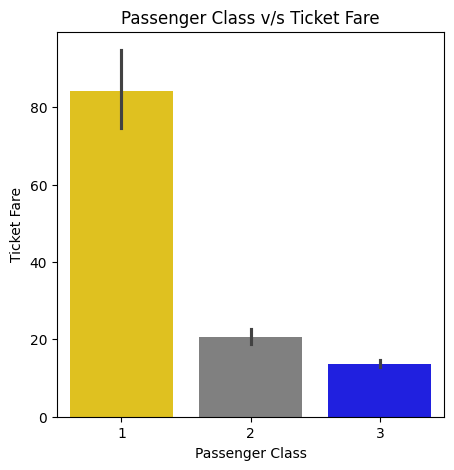

In [47]:
fig = plt.figure(figsize=(5, 5));
sns.barplot(
    df,
    x='Pclass',
    y='Fare',
    hue='Pclass',
    legend=False,
    palette=['gold', 'grey', 'blue']
);
plt.title("Passenger Class v/s Ticket Fare");
plt.xlabel("Passenger Class");
plt.ylabel("Ticket Fare");

**Observations:**
* The ticket fare for higher class passengers was roughly _four times_ as much as the lower class passengers.

**Pclass v/s Age**

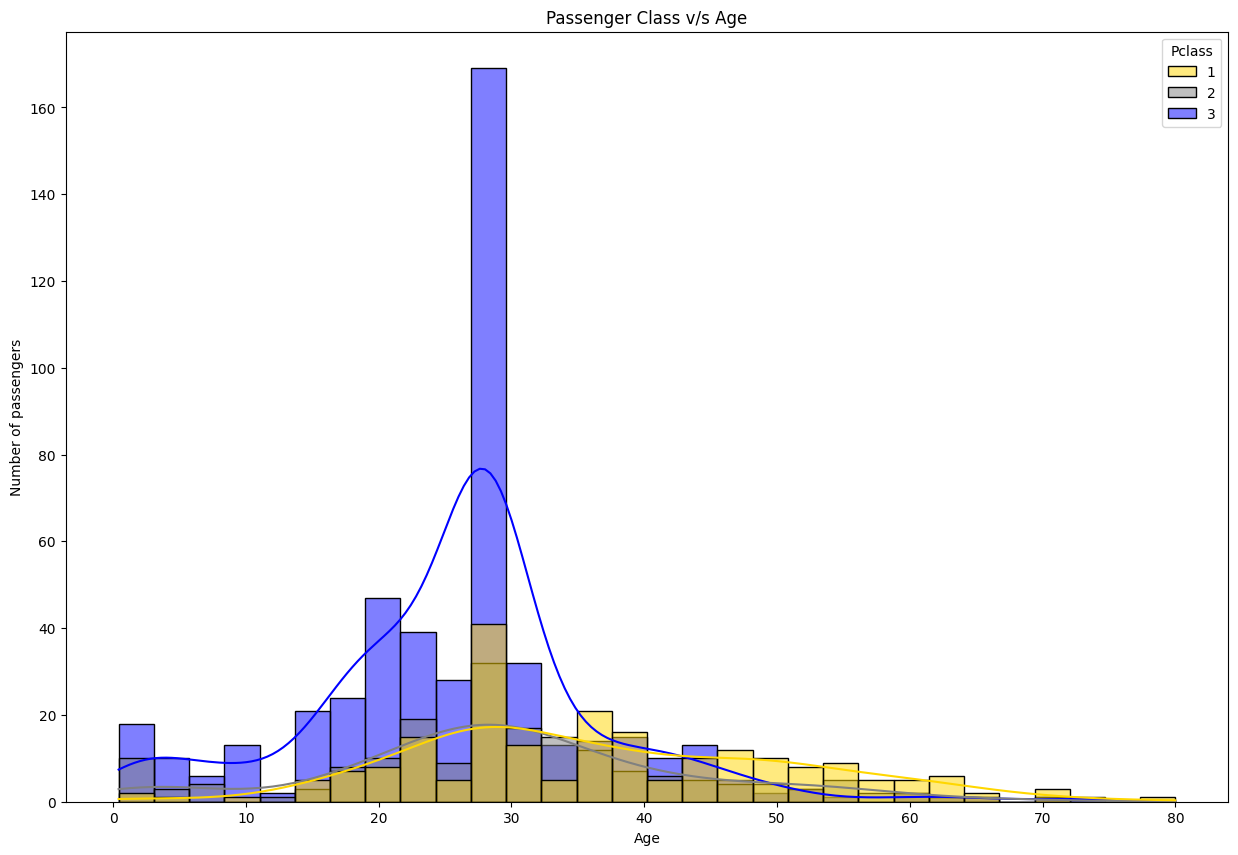

In [48]:
fig = plt.figure(figsize=(15, 10));
sns.histplot(
    df,
    x='Age',
    hue='Pclass',
    kde=True,
    legend=True,
    palette=['gold', 'grey', 'blue']
);
plt.title("Passenger Class v/s Age");
plt.xlabel("Age");
plt.ylabel("Number of passengers");

**Observations:**
* Most of the passengers were of lower socio-economic status, and were relatively young.
* Lower class passengers outnumbered other classes by roughly _300%_.

**Age v/s Parch**

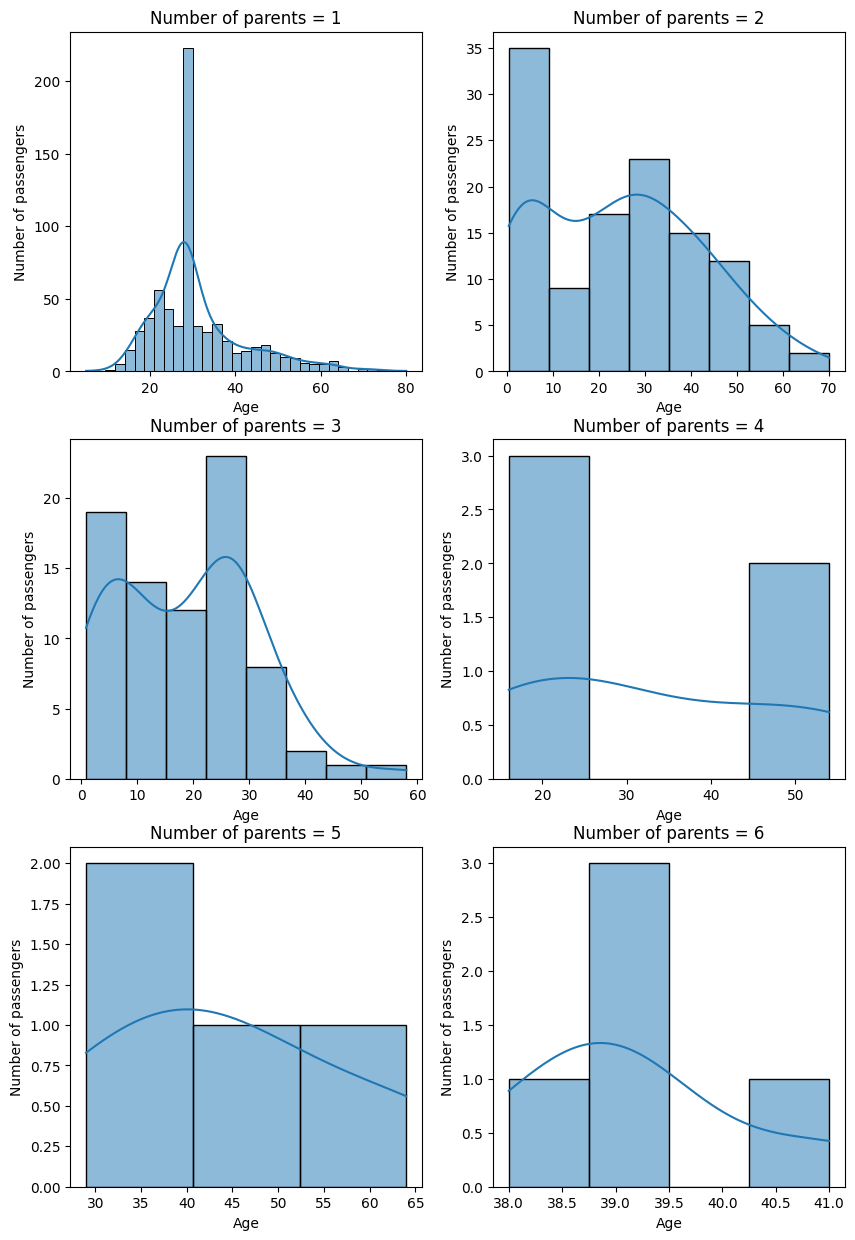

In [49]:
fig, axes = plt.subplots(
    nrows=3,
    ncols=2,
    figsize=(10, 15)
);
num_parents = 0
for row in axes:
    for ax in row:
        sns.histplot(
            x=df.Age[df['Parch'] == num_parents],
            kde=True,
            ax=ax
        )
        num_parents += 1 # increment number of parents
        ax.set_title(f"Number of parents = {num_parents}");
        ax.set_xlabel("Age");
        ax.set_ylabel("Number of passengers");

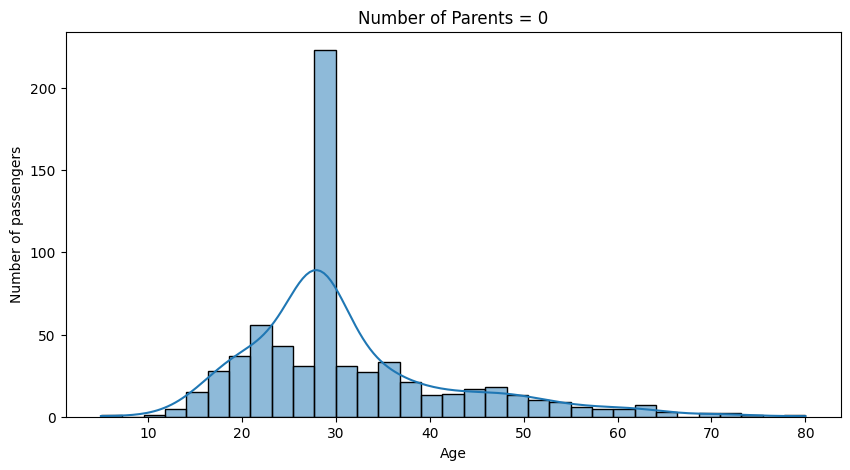

In [50]:
# Number of parents = 0
fig = plt.figure(figsize=(10, 5))
sns.histplot(
    data=df.Age[df['Parch'] == 0],
    kde=True
)
plt.title("Number of Parents = 0");
plt.xlabel("Age");
plt.ylabel("Number of passengers");

**Observations:**
* Most of the passengers travelled alone, or with one of their family members.

# Check for Multicollinearity

In [51]:
# Function to find the VIF values of independent variables
def show_vif(data):
    """
    Returns features and thier corresponding VIF values.

    Parameters:
    data: DataFrame

    Returns:
    res: DataFrame
    
    Note:
    If VIF is greater than 5, then the explanatory variable given by exog_idx is highly collinear with the other explanatory variables,
    and the parameter estimates will have large standard errors because of this.
    """
    res = pd.DataFrame()
    res['Features'] = data.columns
    res['VIF'] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    return res

In [52]:
# Find the VIF values of features
data = add_constant(df)
data = df.drop(['Sex', 'Ticket', 'Embarked'], axis=1)
show_vif(data)

,Features,VIF
0,PassengerId,3.677702
1,Survived,1.643424
2,Pclass,4.584049
3,Age,4.291997
4,SibSp,1.568121
5,Parch,1.556502
6,Fare,1.870697


**Observations**
* All features have VIF values that are less than 5. So we can continue without dropping any columns.`